In [1]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
bacteria = data.load("/home/sameer/Downloads/ImageJ/BacteriaSingleSlice.tif")

In [3]:
bacteria.shape

(1020, 456)

In [4]:
bacteria.dtype

dtype('uint16')

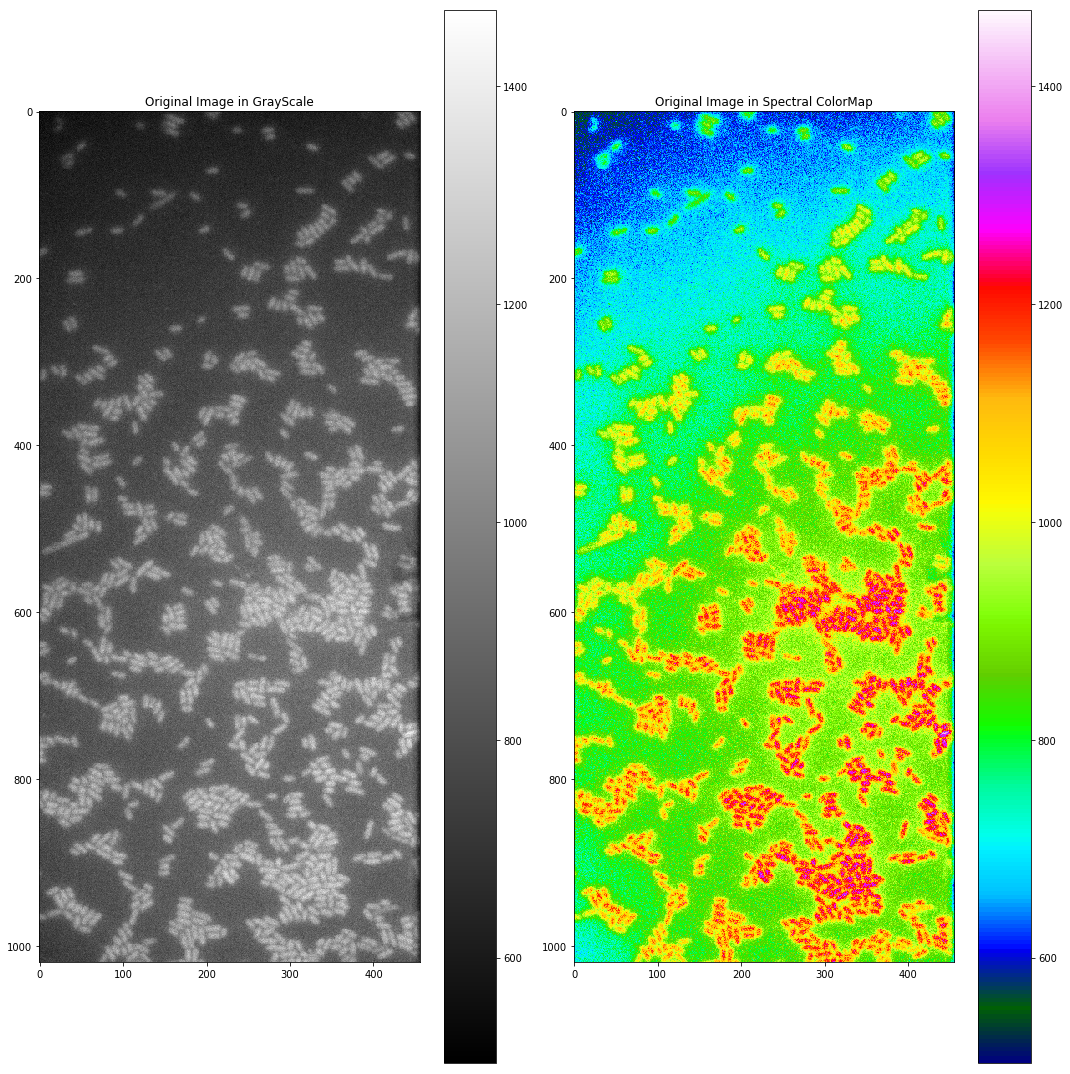

In [5]:
fig1, ax1 = plt.subplots(ncols=2, figsize=(15,15))

img1 = ax1[0].imshow(bacteria, cmap = 'gray')
ax1[0].set_title("Original Image in GrayScale")
fig1.colorbar(img1, ax = ax1[0])

img2 = ax1[1].imshow(bacteria, cmap = 'gist_ncar')
ax1[1].set_title("Original Image in Spectral ColorMap")
fig1.colorbar(img2, ax =  ax1[1])

fig1.tight_layout()

plt.savefig('Image.jpeg', format = 'jpeg', dpi=600) 
plt.show()

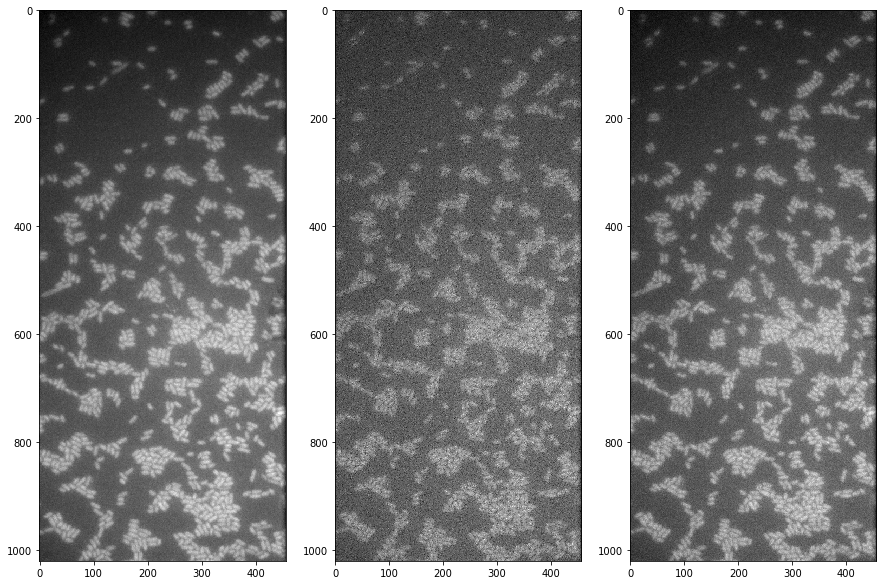

In [6]:
from scipy import ndimage
smooth_img1 = ndimage.median_filter(bacteria, 2)
alpha = 2
sharp_img1 = bacteria + alpha * (bacteria - smooth_img1)
fig2,ax2 = plt.subplots(1,3, figsize = (15,15))
ax2[0].imshow(smooth_img1, cmap='gray')
ax2[1].imshow(sharp_img1, cmap = 'gray')
ax2[2].imshow(bacteria, cmap = 'gray')

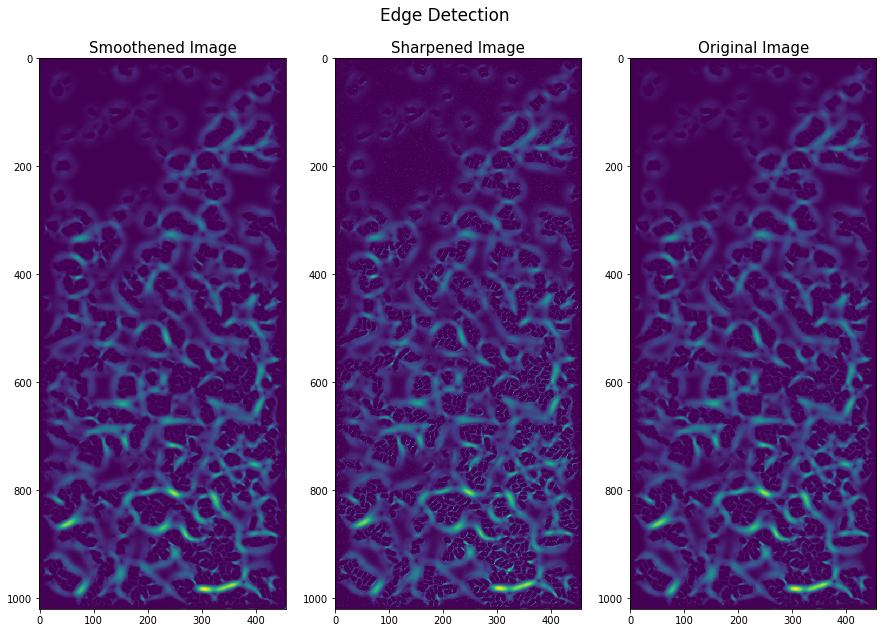

In [7]:
#low_threshold=100, high_threshold=800,
from skimage import filters

edges1 = filters.frangi(smooth_img1)
edges2 = filters.frangi(sharp_img1)
edges3 = filters.frangi(bacteria)

fig3, ax3 = plt.subplots(1,3, figsize = (15,15))
fig3.suptitle('Edge Detection', fontsize = 17)

ax3[0].imshow(edges1, cmap='viridis')
ax3[0].set_title('Smoothened Image', fontsize = 15)

ax3[1].imshow(edges2, cmap='viridis')
ax3[1].set_title('Sharpened Image', fontsize = 15)

ax3[2].imshow(edges3, cmap='viridis')
ax3[2].set_title('Original Image', fontsize = 15)

fig3.subplots_adjust(top = 1.23)
#fig4.tight_layout()

plt.show()

In [8]:
flattened_data = np.ndarray.flatten(bacteria)

In [9]:
np.max(flattened_data)

1470

In [10]:
np.min(flattened_data)

503

In [11]:
flattened_data = np.append(flattened_data, 1471)

In [12]:
n_bins = np.max(flattened_data) - np.min(flattened_data)

In [13]:
hist_data2 = np.histogram(flattened_data, n_bins)
hist_data2;

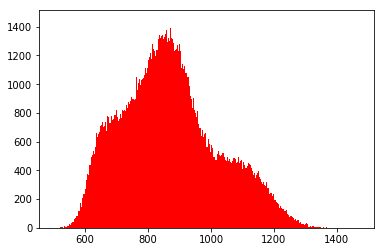

In [14]:
hist_data = plt.hist(flattened_data, n_bins,color = 'red')

In [15]:
np.max(hist_data[0])

1442.0

In [16]:
np.max(hist_data[1])

1471.0

In [17]:
hist_data[0].shape

(968,)

In [18]:
hist_data[0];

In [19]:
hist_data[1].shape

(969,)

In [20]:
hist_data[1];

In [21]:
new_values = np.delete(hist_data[1], -1)

In [22]:
len(new_values)

968

In [23]:
from scipy import optimize

In [24]:
def gaussian(x,argv):
    return argv[0]*np.exp(-4*np.log(2)*((x-argv[1])/argv[2])**2)

#argv[0] = counts, argv[1] = peak position, argv[2] = FWHM

In [25]:
def fit_func(x, a0,b0,c0, a1,b1,c1,a2,b2,c2, a3,b3,c3):
    return gaussian(x, [a0,b0,c0]) + gaussian(x, [a1,b1,c1]) + gaussian(x, [a2,b2,c2]) + gaussian(x, [a3,b3,c3])

In [26]:
start_values = [800, 650, 50, 800, 700, 50, 1400, 900, 50, 600, 1000, 200]

popt, pcov = optimize.curve_fit(fit_func, new_values, hist_data[0], p0 = (800, 650, 50, 800, 700, 50, 
            1400, 900, 50, 400, 1200, 200), bounds = (0,2000), method = 'trf')

In [62]:
popt

array([  428.93704222,   642.78365012,    88.39243721,   492.62496266,
         716.51781744,   127.88888039,  1316.15265706,   860.03958618,
         184.62357009,   449.03748485,  1089.93646017,   208.30963987])

In [28]:
pcov;

In [29]:
perr = np.sqrt(np.diag(pcov))

In [30]:
perr;

In [31]:
pcov.shape

(12, 12)

In [32]:
yfitdata = np.array([])

for i in new_values:
    yfitdata = np.append(yfitdata, fit_func(i, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],
            popt[6],popt[7],popt[8], popt[9],popt[10],popt[11]))

In [33]:
RMSerr = np.sqrt(np.sum((hist_data[0] - yfitdata)**2)/len(yfitdata))

RMSerr

23.185935052862614

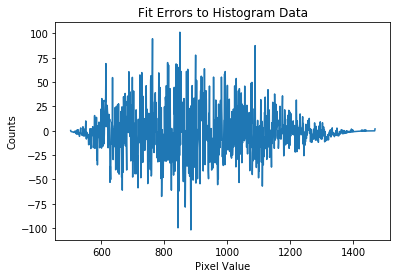

In [34]:
fig4, ax4 = plt.subplots()
ax4.plot(new_values, (hist_data[0] - yfitdata))
ax4.set_xlabel('Pixel Value')
ax4.set_ylabel('Counts')
ax4.set_title('Fit Errors to Histogram Data')
plt.show()

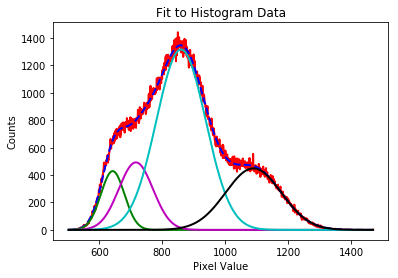

In [35]:
fig5, ax5 = plt.subplots()
ax5.plot(new_values, hist_data[0], 'r-', new_values, yfitdata, 'b--', 
         new_values, gaussian(new_values,[popt[0],popt[1],popt[2]]), 'g-', 
         new_values, gaussian(new_values,[popt[3],popt[4],popt[5]]), 'm-',
         new_values, gaussian(new_values,[popt[6],popt[7],popt[8]]), 'c-',
         new_values, gaussian(new_values,[popt[9],popt[10],popt[11]]), 'k-',
         lw=2) #new_values, gaussian(new_values,[popt[9],popt[10],popt[11]]), 'k-',
ax5.set_xlabel('Pixel Value')
ax5.set_ylabel('Counts')
ax5.set_title('Fit to Histogram Data')
plt.show()


In [36]:
gaussimg1=np.where(bacteria>(popt[1] + 0.5 * popt[2]), 0, bacteria)

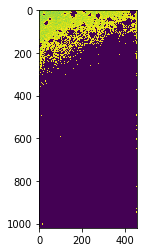

In [37]:
plt.imshow(gaussimg1)

In [38]:
gaussimg2 = np.where(bacteria>(popt[4] + 0.5 * popt[5]), 0, bacteria)

gaussimg2 = np.where(gaussimg2 == gaussimg1, 0, gaussimg2)

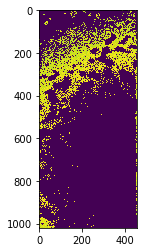

In [39]:
plt.imshow(gaussimg2)

In [40]:
gaussimg3 = np.where(bacteria>(popt[7] + 0.5 * popt[8]), 0, bacteria)

gaussimg3 = np.where(gaussimg3 == gaussimg1 + gaussimg2, 0, gaussimg3)

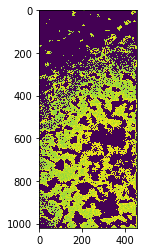

In [41]:
plt.imshow(gaussimg3)

In [42]:
#gaussimg4 = np.where(bacteria_rgb>(popt[10] + 0.5 * popt[11]), 0, bacteria_rgb)

gaussimg4 = np.where(bacteria == gaussimg1 + gaussimg2 + gaussimg3, 0, bacteria)

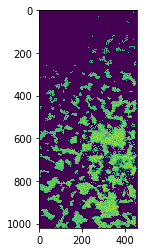

In [43]:
plt.imshow(gaussimg4)

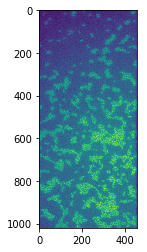

In [44]:
plt.imshow(gaussimg1 + gaussimg2 + gaussimg3 + gaussimg4)

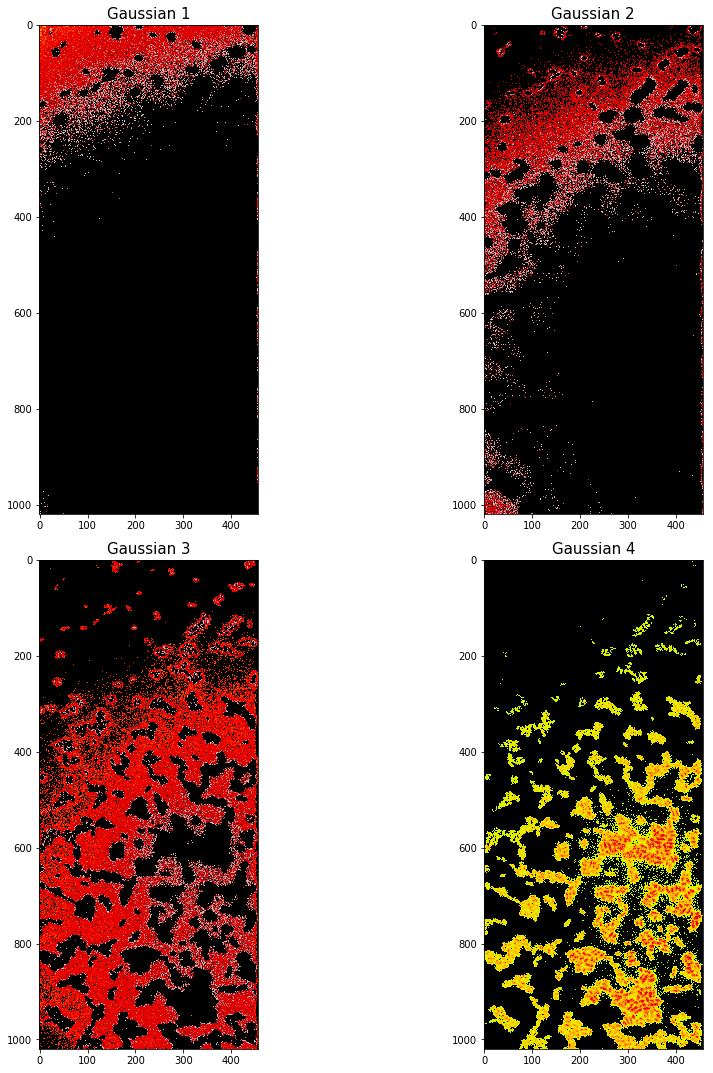

In [45]:
fig6, ax6 = plt.subplots(2,2,figsize=(15,15))

ax6[0,0].imshow(gaussimg1, cmap = 'nipy_spectral')
ax6[0,0].set_title("Gaussian 1", fontsize = 15)


ax6[0,1].imshow(gaussimg2, cmap = 'nipy_spectral')
ax6[0,1].set_title("Gaussian 2", fontsize = 15)


ax6[1,0].imshow(gaussimg3, cmap = 'nipy_spectral')
ax6[1,0].set_title("Gaussian 3", fontsize = 15)

ax6[1,1].imshow(gaussimg4, cmap = 'nipy_spectral')
ax6[1,1].set_title("Gaussian 4", fontsize = 15)

fig6.tight_layout()

plt.show()

In [63]:
xlim1 = 247
ylim1 = 720
xlim2 = 265
ylim2 = 736

zoom_img1=bacteria[ylim1:ylim2+1,xlim1:xlim2+1]
zoom_img2=gaussimg4[ylim1:ylim2+1,xlim1:xlim2+1]#/np.max(gaussimg4)
zoom_img2 = np.where(zoom_img2 == 0, 800, zoom_img2)

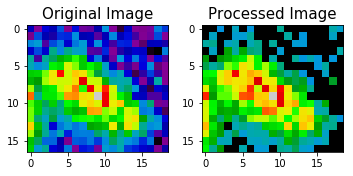

In [64]:
fig7, ax7 = plt.subplots(1,2, figsize = (5,5))

ax7[0].imshow(zoom_img1, cmap='nipy_spectral')
ax7[0].set_title('Original Image', fontsize = 15)

ax7[1].imshow(zoom_img2, cmap='nipy_spectral')
ax7[1].set_title('Processed Image', fontsize = 15)

fig7.tight_layout()

plt.show()

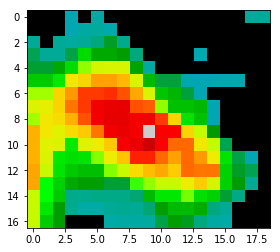

In [65]:
from scipy import ndimage
smooth_img2 = ndimage.median_filter(zoom_img2, 3)
plt.imshow(smooth_img2, cmap='nipy_spectral')

In [66]:
zoom_img1.shape

(17, 19)

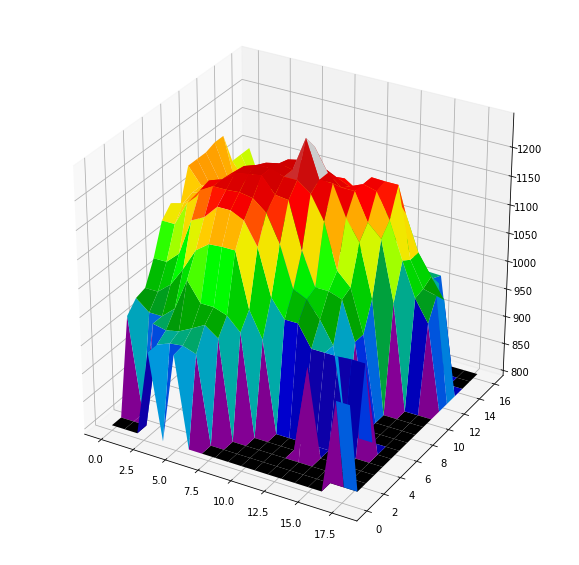

In [67]:
from mpl_toolkits.mplot3d import Axes3D

xx, yy = np.meshgrid(np.linspace(0,xlim2-xlim1,xlim2-xlim1+1), np.linspace(0,ylim2-ylim1,ylim2-ylim1+1))

fig8 = plt.figure(figsize=(10,10))
ax8 = fig8.add_subplot(111, projection='3d')
ax8.plot_surface(xx, yy, smooth_img2, cmap = 'nipy_spectral')

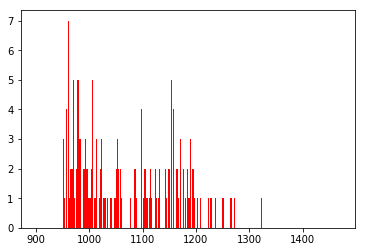

In [68]:
zoom_img1_hist = plt.hist(zoom_img2.ravel(), range = [900, 1470], bins = 440, color = 'r')

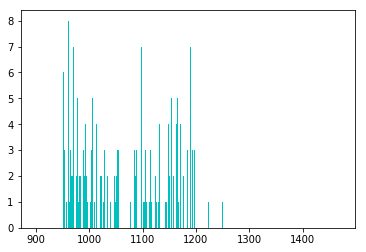

In [69]:
zoom_img2_hist = plt.hist(smooth_img2.ravel(), range = [900, 1470], bins = 440, color = 'c')